In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
time = input("Enter the time : ")
time = int(time)

Enter the time : 12


In [3]:
dataset =  pd.read_excel('Book1_JULY_MONTH _SPEEDPOWER.xlsx')
X_d = dataset.iloc[(time+3) : (time+4) ,1:150].values.reshape(-1,1)

FileNotFoundError: ignored

In [5]:
X_d

array([[3.62],
       [3.06],
       [3.35],
       [3.89],
       [6.2],
       [6.62],
       [7.84],
       [9.8],
       [9.93],
       [9.18],
       [8.82],
       [9.79],
       [8.34],
       [10.72],
       [10.22],
       [9.48],
       [9.19],
       [7.22],
       [7.8],
       [8.46],
       [7.5],
       [6.45],
       [4.6],
       [4.16],
       [4.72],
       [4.43],
       [3.77],
       [3.97],
       [7.54],
       [6.63],
       [9.27],
       [8.36],
       [8.66],
       [9.74],
       [9.5],
       [8.1],
       [7.12],
       [8.66],
       [4.73],
       [1.33],
       [2.57],
       [5.16],
       [5.04],
       [6.1],
       [3.81],
       [2.8],
       [5.93],
       [4.89],
       [6.47],
       [6.46],
       [4.47],
       [5.77],
       [4.44],
       [6.57],
       [6.71],
       [5.16],
       [6.27],
       [7.54],
       [4.65],
       [3.84],
       [3.78],
       [8.77],
       [8.29],
       [7.28],
       [6.61],
       [5.2],
       [0.46],
   

Text(0.5, 1.0, 'Date vs Wind Speed at time equals to : 12')

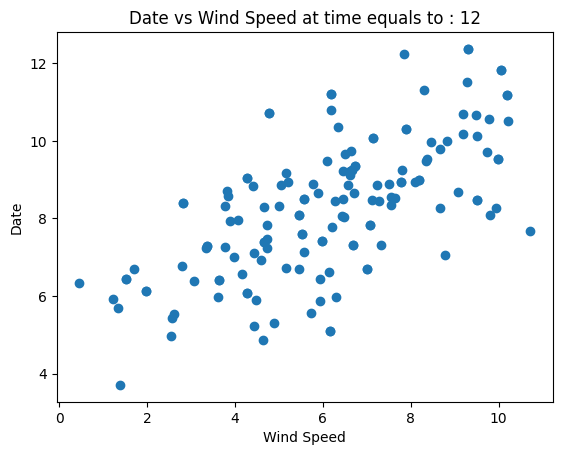

In [6]:
# For first july
X_1 = dataset.iloc[(time+3) : (time+4) ,1:150].values.reshape(-1,1)
y_1 = dataset.iloc[3:4 , 1:150].values.reshape(-1,1)
plt.scatter(X_1, y_1, marker='o')
plt.xlabel('Wind Speed')
plt.ylabel('Date')
plt.title('Date vs Wind Speed at time equals to : ' + str(time))


In [7]:
normalized_data = dataset.iloc[(time+3) : (time+4) ,1:150].values.reshape(-1,1)
normalized_data = normalized_data.astype(np.float32)


In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 14
n_features = 1
generator = TimeseriesGenerator(normalized_data, normalized_data, length=n_input, batch_size=1)


In [9]:
X_train = []
y_train = []
for i in range (106):

    X,y = generator[i]
    print(f'Given the Array : \n {X.flatten()}')
    print(f'Predicted the Array : \n {y}')
    X_train.append(X)  # Append a single element
    y_train.append(y)

Given the Array : 
 [ 3.62  3.06  3.35  3.89  6.2   6.62  7.84  9.8   9.93  9.18  8.82  9.79
  8.34 10.72]
Predicted the Array : 
 [[10.22]]
Given the Array : 
 [ 3.06  3.35  3.89  6.2   6.62  7.84  9.8   9.93  9.18  8.82  9.79  8.34
 10.72 10.22]
Predicted the Array : 
 [[9.48]]
Given the Array : 
 [ 3.35  3.89  6.2   6.62  7.84  9.8   9.93  9.18  8.82  9.79  8.34 10.72
 10.22  9.48]
Predicted the Array : 
 [[9.19]]
Given the Array : 
 [ 3.89  6.2   6.62  7.84  9.8   9.93  9.18  8.82  9.79  8.34 10.72 10.22
  9.48  9.19]
Predicted the Array : 
 [[7.22]]
Given the Array : 
 [ 6.2   6.62  7.84  9.8   9.93  9.18  8.82  9.79  8.34 10.72 10.22  9.48
  9.19  7.22]
Predicted the Array : 
 [[7.8]]
Given the Array : 
 [ 6.62  7.84  9.8   9.93  9.18  8.82  9.79  8.34 10.72 10.22  9.48  9.19
  7.22  7.8 ]
Predicted the Array : 
 [[8.46]]
Given the Array : 
 [ 7.84  9.8   9.93  9.18  8.82  9.79  8.34 10.72 10.22  9.48  9.19  7.22
  7.8   8.46]
Predicted the Array : 
 [[7.5]]
Given the Array : 
 [

In [10]:
X_train = np.array(X_train)

X_train

array([[[[ 3.62],
         [ 3.06],
         [ 3.35],
         ...,
         [ 9.79],
         [ 8.34],
         [10.72]]],


       [[[ 3.06],
         [ 3.35],
         [ 3.89],
         ...,
         [ 8.34],
         [10.72],
         [10.22]]],


       [[[ 3.35],
         [ 3.89],
         [ 6.2 ],
         ...,
         [10.72],
         [10.22],
         [ 9.48]]],


       ...,


       [[[ 4.77],
         [ 4.27],
         [ 1.97],
         ...,
         [ 4.27],
         [ 7.77],
         [ 7.01]]],


       [[[ 4.27],
         [ 1.97],
         [ 4.67],
         ...,
         [ 7.77],
         [ 7.01],
         [ 5.45]]],


       [[[ 1.97],
         [ 4.67],
         [ 6.68],
         ...,
         [ 7.01],
         [ 5.45],
         [ 5.98]]]], dtype=float32)

In [11]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)
y_train

array([[10.22],
       [ 9.48],
       [ 9.19],
       [ 7.22],
       [ 7.8 ],
       [ 8.46],
       [ 7.5 ],
       [ 6.45],
       [ 4.6 ],
       [ 4.16],
       [ 4.72],
       [ 4.43],
       [ 3.77],
       [ 3.97],
       [ 7.54],
       [ 6.63],
       [ 9.27],
       [ 8.36],
       [ 8.66],
       [ 9.74],
       [ 9.5 ],
       [ 8.1 ],
       [ 7.12],
       [ 8.66],
       [ 4.73],
       [ 1.33],
       [ 2.57],
       [ 5.16],
       [ 5.04],
       [ 6.1 ],
       [ 3.81],
       [ 2.8 ],
       [ 5.93],
       [ 4.89],
       [ 6.47],
       [ 6.46],
       [ 4.47],
       [ 5.77],
       [ 4.44],
       [ 6.57],
       [ 6.71],
       [ 5.16],
       [ 6.27],
       [ 7.54],
       [ 4.65],
       [ 3.84],
       [ 3.78],
       [ 8.77],
       [ 8.29],
       [ 7.28],
       [ 6.61],
       [ 5.2 ],
       [ 0.46],
       [ 1.38],
       [ 1.23],
       [ 4.64],
       [ 4.99],
       [ 4.41],
       [ 2.62],
       [ 5.58],
       [ 6.44],
       [ 6.51],
       [

In [12]:
X.shape

(1, 14, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (n_input , n_features)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam' , loss = 'mse', metrics=['accuracy'] )

In [16]:
model.fit(generator,validation_data=(generator), batch_size = 32, epochs = 250)

Epoch 1/250
135/135 [==============================] - 9s 30ms/step - loss: 6.6052 - accuracy: 0.0000e+00 - val_loss: 4.8640 - val_accuracy: 0.0000e+00
Epoch 2/250
135/135 [==============================] - 3s 21ms/step - loss: 4.1841 - accuracy: 0.0000e+00 - val_loss: 3.7957 - val_accuracy: 0.0000e+00
Epoch 3/250
135/135 [==============================] - 4s 26ms/step - loss: 4.0605 - accuracy: 0.0000e+00 - val_loss: 3.4454 - val_accuracy: 0.0000e+00
Epoch 4/250
135/135 [==============================] - 3s 21ms/step - loss: 3.9368 - accuracy: 0.0000e+00 - val_loss: 3.3446 - val_accuracy: 0.0000e+00
Epoch 5/250
135/135 [==============================] - 3s 20ms/step - loss: 3.7252 - accuracy: 0.0000e+00 - val_loss: 3.0923 - val_accuracy: 0.0000e+00
Epoch 6/250
135/135 [==============================] - 3s 24ms/step - loss: 3.6077 - accuracy: 0.0000e+00 - val_loss: 3.1814 - val_accuracy: 0.0000e+00
Epoch 7/250
135/135 [==============================] - 3s 21ms/step - loss: 3.3790 - acc

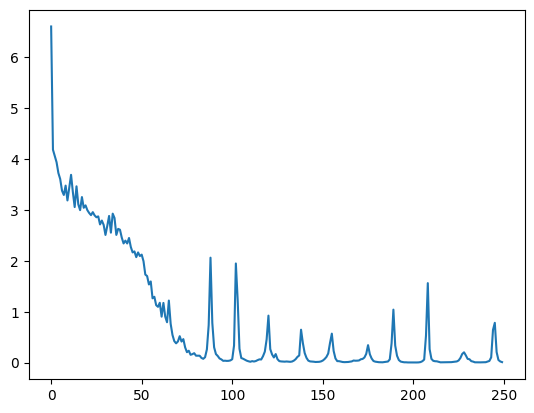

In [17]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

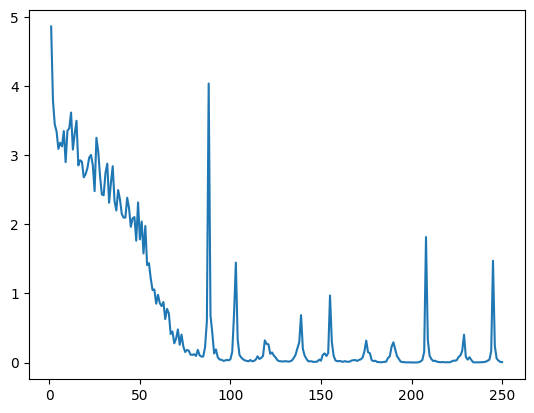

In [18]:
val_loss = model.history.history['val_loss']
epochs = range(1, len(val_loss) + 1)
plt.plot(epochs, val_loss, label='Validation Loss')

In [19]:
last_train_batch = normalized_data[-14:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
last_train_batch = last_train_batch.astype(np.float32)
last_train_batch

array([[[ 1.97],
        [ 4.67],
        [ 6.68],
        [ 6.67],
        [ 8.19],
        [10.06],
        [10.18],
        [ 7.88],
        [ 7.07],
        [ 4.27],
        [ 7.77],
        [ 7.01],
        [ 5.45],
        [ 5.98]]], dtype=float32)

In [20]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 829ms/step


array([[4.6389284]], dtype=float32)

In [21]:
#test_prediction = []

#first_eval_batch = normalized_data[-n_input:]


In [22]:
#current_batch = first_eval_batch.reshape((1,n_input,n_features))
#current_batch = current_batch.astype(float)
